# Preliminary operations

In [1]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ADASYN 
from imblearn.over_sampling import ADASYN

# collections
from collections import Counter
from collections import defaultdict

# Dummy clf
from sklearn.dummy import DummyClassifier
# metrics
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

# repeated stratified kfold
from sklearn.model_selection import RepeatedStratifiedKFold

# random search cv
from sklearn.model_selection import RandomizedSearchCV

# KNN
from sklearn.neighbors import KNeighborsClassifier

# plot_roc
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

# PCA
from sklearn.decomposition import PCA

from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
# mont Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# import training data
df_data_train = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_TRAIN_no_outliers.xlsx", index_col="Unnamed: 0")
df_info_train = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_info_TRAIN_no_outliers.xlsx", index_col="Unnamed: 0")

X_train = df_data_train.values
y_train = df_info_train['vocal_channel']

# import test data
df_data_test = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_TEST_no_outliers.xlsx", index_col="Unnamed: 0")
df_info_test = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_info_TEST_no_outliers.xlsx", index_col="Unnamed: 0")

X_test = df_data_test.values
y_test = df_info_test['vocal_channel']

In [5]:
df_data_train

,sum,std,q25,kur,skew,lag1_sum,lag1_kur,lag1_skew,zc_sum,mfcc_sum,...,mfcc_q05_w4,mfcc_q95_w4,mfcc_q99_w4,mfcc_kur_w4,sc_std_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_kur_w4
0,0.716365,-1.159462,1.215433,0.859870,1.608196,0.032995,0.662262,0.805546,-1.500797,0.399234,...,0.914663,-0.670034,-1.541948,-0.202342,-0.425145,3.147197,-2.200824,0.228251,1.542380,-0.159600
1,0.669143,-1.108453,1.215433,1.070644,1.658463,0.032995,0.275624,1.241144,-1.321006,0.408776,...,0.465963,-0.925068,-0.828006,0.275867,-0.427448,-0.229617,-0.575310,-0.231871,1.094347,0.111549
2,0.723227,-0.975264,2.047744,1.146381,1.781550,-1.036084,0.763118,-0.128356,-1.750464,0.490061,...,0.637260,-0.595362,-1.139805,-0.014546,-0.246588,2.742928,-1.781613,-0.390360,1.161032,-0.289829
3,0.708504,-1.006749,1.215433,1.749201,1.981405,-0.815534,0.707610,1.132806,-1.416084,0.750825,...,1.016104,-0.098577,-0.717890,-0.392469,-0.555570,-0.462721,-0.367839,-0.824689,1.017073,0.412375
4,0.705644,-1.371989,1.215433,0.581488,1.436854,-0.815534,0.370417,-0.060381,-1.569077,-0.145204,...,0.736785,-0.583115,-0.797341,0.154515,-0.249430,0.605878,-0.549321,0.241436,1.091298,-0.159600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,-0.533551,-0.926692,2.047744,-0.775907,-0.974597,0.032995,0.234861,-0.828073,-1.373922,-0.346083,...,0.664345,-1.699436,-1.259249,0.894243,1.572822,1.191457,-0.871113,-0.858915,0.261546,-0.157863
1774,-0.512702,-0.494895,1.215433,-0.050756,-0.482154,0.032995,1.144182,-1.138132,-0.648233,0.011200,...,0.339675,-2.119495,-0.552764,1.389867,1.466784,1.206284,-0.742265,-1.242542,-0.273897,-0.282172
1775,-0.602680,-0.374843,2.047744,-0.945497,-0.285060,0.032995,0.858489,-0.565557,-1.728149,-0.008234,...,-0.089512,-1.531537,-0.442736,1.290250,0.875711,1.581088,-0.871506,-1.276408,-0.053277,0.231495
1776,-0.421299,-0.160226,1.215433,-1.368889,-0.548836,0.032995,-0.013708,-2.119959,0.007696,-0.385782,...,-0.377597,-1.926863,-1.238323,1.709477,1.727957,-0.044882,-0.627522,-0.587311,-0.180552,0.713603


##PCA

In [6]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [7]:
X_train_pca.shape

(1778, 2)

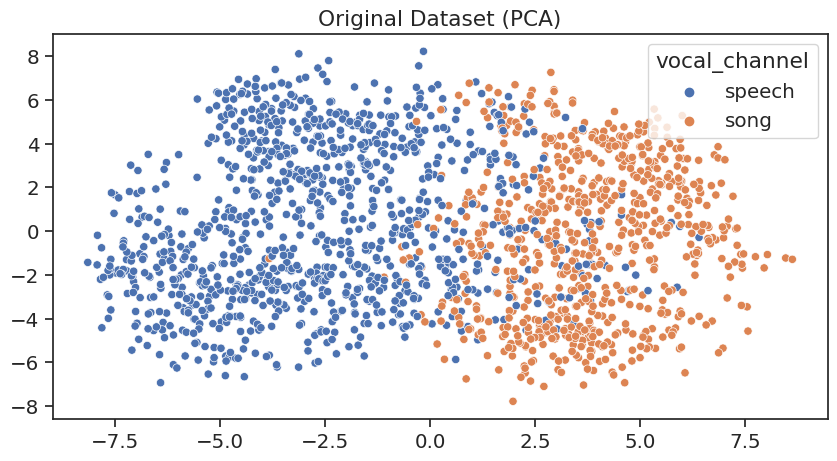

In [8]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.3)

sns.scatterplot(
    x = X_train_pca[:, 0],
    y = X_train_pca[:, 1],
    hue=y_train,
    legend="full"
).set(title="Original Dataset (PCA)")

plt.savefig("dataset_original.svg")

##Dataset unbalancing

In [9]:
# get number of elements for each class
np.unique(df_info_train['vocal_channel'], return_counts=True)

(array(['song', 'speech'], dtype=object), array([ 732, 1046]))

In [10]:
# get rows to remove for an unbalanced dataset 
rows2remove = np.random.choice(df_info_train[df_info_train['vocal_channel'] == "song"].index, 732 - 11, replace=False)
rows2remove

array([  95,  601,  684,   69,  905, 1409, 1117, 1002, 1086, 1006,  378,
        193,  769, 1620,  894,  994, 1402, 1308, 1592,  584,  977, 1204,
        472,   78,  766,  872,  791, 1194, 1516,  365, 1197,  200, 1687,
         81,  783,  594,  488, 1010,  284, 1287,  875, 1009, 1391,  582,
       1623, 1183, 1513,  463, 1492, 1295, 1396,  297, 1186,   83, 1418,
         62, 1421,  883,  483, 1007,  975,  902, 1416,  781, 1515,  502,
       1092,  467, 1494, 1588, 1716,  100, 1216, 1694, 1383,  984,  172,
       1490,  376, 1499,  270,  370, 1104,  683, 1115,  677,  880,  794,
       1215, 1485,  877,  183,   70,  670, 1300,  779, 1089,  373,  666,
        191,  563, 1601, 1699, 1312, 1500, 1077,  978, 1697,  279,  802,
       1298, 1496,   98,  807,  689, 1214,  374,  202, 1001, 1293, 1596,
        681, 1219,  597, 1093, 1627,   73, 1179, 1118,  778, 1404, 1201,
       1426, 1297, 1584, 1685,  808,   60, 1520,  776, 1313, 1715, 1004,
       1321, 1502,  578, 1094,  491, 1314,  203, 14

In [11]:
rows2remove = [1309,  577, 1290,  594,  663, 1584,  167, 1718, 1602,  807, 1705,
        976,   70,  977, 1288, 1322,  907,  898, 1693,  883,  276, 1696,
        779,  801, 1393, 1384,  272, 1492,  177, 1097, 1514,  974,  982,
        277,   72,  473,  164, 1622, 1598,  876, 1189, 1500, 1307, 1487,
       1002,  682, 1000,  369, 1612,  985,  563, 1315,  572,  376,   78,
       1005,  205,  887,   73, 1115, 1593,  469,  388,  675,  570,  889,
       1323, 1600, 1419, 1717, 1687, 1626,  879,  688, 1716,  768, 1099,
       1088,   65, 1406,  182,   90,  803, 1079,  776, 1294, 1424,  200,
        705,  280, 1388, 1187,  902, 1220,  279, 1078,  601,  997,  891,
        685, 1521, 1586, 1686, 1515,  984, 1597, 1283,  267, 1191, 1181,
       1185,  366,  901,  178,  486,  696,  774,  492,  769, 1012, 1200,
        893, 1285,  475,  900, 1087, 1289, 1213,  265,  673,  564, 1416,
       1391, 1102,   66, 1708,  386,  989,  183,  368,  790,  781,  387,
       1683, 1483,  899, 1614, 1182, 1596, 1092,  203, 1396, 1308, 1603,
        582,  698, 1619,  775, 1684, 1702, 1195,  503,  699,  285, 1387,
        379, 1489, 1095,  780,   80, 1413, 1608,  669, 1402,  702,  188,
        877,  591,  602, 1594, 1216,  286,  289, 1692,  170,   84, 1313,
       1302, 1188, 1588,  278, 1494,  999,   87,  895,  374,  586,  973,
       1524, 1523,  581,  896,  988, 1700,  798,  897, 1320,  580,   94,
        283, 1701,  190,  773, 1392,  184, 1513,  470, 1109, 1401, 1418,
        772, 1496, 1196, 1605, 1421, 1082,  703,  792, 1179,  362, 1301,
        401,  173, 1282,  908,  273,  367, 1616,  592,  463,  464,  662,
        189,  904,  794, 1694, 1423, 1014, 1319, 1096,  903,  892,  981,
       1300,  587,  808,  869,  571,  471, 1214,  704,  299,  360, 1085,
       1715,  786, 1420, 1522,   86,  871,  290, 1713,   64,  884,  287,
        683, 1695,  301,  787, 1501, 1118, 1627, 1013,  282,  778,  998,
       1310, 1077,   88,  766,  990,  494,  468, 1409,  795,  269, 1314,
       1199,  371,  292,  474, 1611, 1293,   77, 1184, 1613, 1688, 1491,
        665, 1510, 1305,  599,  195,  910, 1113,  888,  873,  101, 1595,
        288,  565,  996,  394, 1601,  574,   69,  370, 1590,  275, 1389,
       1417,  300, 1518,  885, 1291,  575,   67,  674, 1324,  980,  479,
       1292, 1499,  983, 1710,  491, 1003, 1495,  365, 1312,  199,  488,
        578,  193, 1706,  770,  576,  791,  169, 1010, 1422,  194, 1091,
        805,  868,  694,  171, 1604,  799,  809,  767,  589,  882, 1624,
        679,  191,  906, 1707,  894, 1709,  561,  465,  784, 1107, 1192,
        185, 1505, 1110, 1703,  797,  375, 1714,  771, 1197, 1212, 1399,
        482,  695,  476, 1086, 1405,  701,  878,  206,   93, 1106,  590,
       1425,  168,  175,  295, 1411,  399, 1105, 1408, 1512,  180, 1296,
       1690,  804, 1101,  681, 1201, 1299, 1075, 1093,  172,  666,  480,
        359,  573,  880,  687, 1591,   96, 1304, 1426,  364, 1205, 1390,
       1606, 1407,  266, 1202, 1281, 1697,  886,  872, 1117,   85,  785,
        678,  697,  567,  462,  603,  691,  102,  783, 1620,  975,  583,
       1497,  604,   74,  579,  100,  569, 1011,  380,  693, 1617,  664,
        393,  389,  500,   83, 1080,  499,  361,  978, 1204, 1511,  598,
        472,   75,  911,  298,  596, 1286,  890,  176,  588, 1321, 1112,
        700, 1217,  502, 1592,  484,  202,  174,  493, 1317,  485, 1298,
       1508, 1306,  391,  672,  800, 1084, 1221, 1219, 1689,  870, 1297,
       1004,  690, 1076,  789,  179, 1403,  467, 1114, 1486, 1395, 1506,
       1098,  670,   62, 1100, 1183,  181, 1484, 1414,  373, 1412,   92,
       1625, 1691,  909,  676,  384,  398,  585, 1621,  987,   60, 1008,
       1623, 1610, 1311, 1116,  793, 1685, 1682,  993, 1507, 1104,  363,
        489,  477,  802, 1295, 1519,   91,  671,  595, 1503,   99,  686,
        166, 1516,  385, 1081, 1111,  782,  198,  293,  501, 1520,  667,
       1001,  378,  466,  291, 1108, 1397,  383, 1699,  874, 1618,   71,
       1218,  396, 1211, 1599,  593,  294,  806,  381,  497, 1615, 1386,
         76, 1284,  995,  390, 1207, 1009,  788,  284, 1287, 1090,  296,
       1711,  684,  163, 1482,   82,  382, 1180,  483,  196,  271,  395,
       1681, 1209, 1415,  495,  881,  186, 1178, 1481,  274, 1103, 1498,
       1488,  297, 1083, 1509,   97, 1490, 1194, 1383,   95,  979, 1493,
       1410,  268,  692, 1698, 1210,  372, 1404,  875, 1400,   89,  600,
       1712, 1398,  204,  187,   79, 1006,  972,  281,  270,  461,  680,
         59, 1203, 1316,  496,  487,  498,   68, 1089,  392, 1502, 1193,
        481,  201, 1517, 1318, 1587,  377,  994,  777, 1704,  562,  991,
        992,  986,   81, 1303,  192, 1589, 1585, 1094,  905, 1394, 1007,
        197, 1198,  597,   61,  165,  689, 1504, 1385,  568, 1208,  478,
        677,  566,  397,  668,   63,  584]

In [12]:
# get new training dataset
df2_data_train = df_data_train.drop(index=rows2remove, axis=0)
df2_info_train = df_info_train.drop(index=rows2remove, axis=0)

In [13]:
# check number of elements for each class
np.unique(df2_info_train['vocal_channel'], return_counts=True)

(array(['song', 'speech'], dtype=object), array([  11, 1046]))

In [14]:
# get training values
X_train = df2_data_train.values
y_train = df2_info_train['vocal_channel']

###PCA

In [15]:
X_train_pca = pca.transform(X_train)

In [16]:
X_train_pca.shape

(1057, 2)

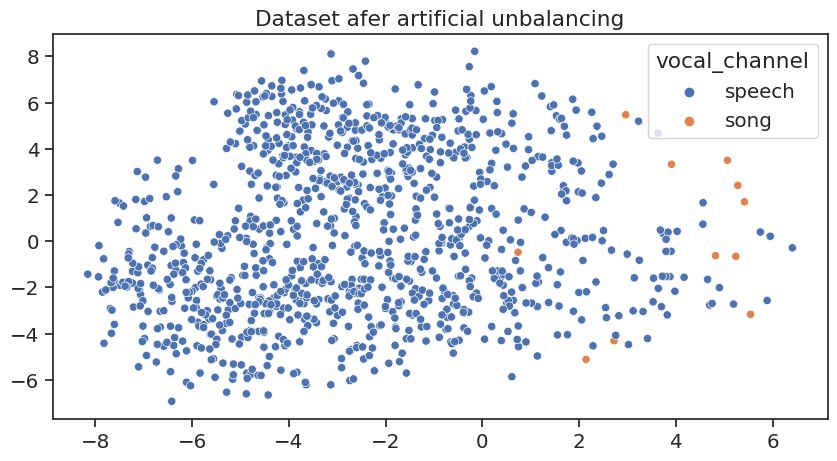

In [17]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.3)

sns.scatterplot(
    x = X_train_pca[:, 0],
    y = X_train_pca[:, 1],
    hue=y_train,
    legend="full"
).set(title="Dataset afer artificial unbalancing")

plt.savefig("dataset_unbalanced.svg")

# Classification

In [18]:
# get dummy classifier
dummy_clf = DummyClassifier(
    strategy="stratified", 
    random_state=0
)

# fit dummy classifier
dummy_clf.fit(
    X_train, 
    y_train
)

# get baseline for testset (54.48%)
print(dummy_clf.score(X=None, y=y_test))

0.5614617940199336


##Hyperparameters tuning

In [19]:
X_train.shape

(1057, 96)

In [20]:
# get parameters grid for tuning
param_grid = {
    "n_neighbors": range(1, X_train.shape[0]//2),
    "metric": ["cityblock", "euclidean"],
}

# get KNN
KNC = KNeighborsClassifier(
        n_jobs = -1,
        weights="distance"
)

# get Repeated Stratified K Fold
RSKF = RepeatedStratifiedKFold(
        n_splits = 20, 
        n_repeats = 3, 
        random_state = 0
)

# get Randomized Search CV
grid = RandomizedSearchCV(
    KNC,
    n_iter=1000,
    param_distributions = param_grid,
    cv=RSKF,
    n_jobs = -1,
    refit = True,
    verbose=1,
    random_state=0
)

# fit GridSearchCV
grid.fit(X_train, y_train)

Fitting 60 folds for each of 1000 candidates, totalling 60000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 11 members, which is less than n_splits=20.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 11 members, which is less than n_splits=20.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 11 members, which is less than n_splits=20.
  warnings.warn(


KeyboardInterrupt: ignored

In [21]:
# get best parameters for KNN
print(grid.best_params_)
# get best obtained score
print(grid.best_score_)

AttributeError: ignored

In [ ]:
# export tuning results
grid_res = pd.DataFrame(grid.cv_results_)
grid_res.to_excel("knn_grid_res.xlsx") 

##Test

In [22]:
# get tuned classifier
KNC = KNeighborsClassifier(
    n_neighbors=1, 
    metric="euclidean", 
    weights="distance"
)

In [23]:
# fit tuned classifier
KNC = KNC.fit(X_train, y_train)
y_pred = KNC.predict(X_test)

# get classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        song       0.99      0.57      0.72       264
      speech       0.75      1.00      0.85       338

    accuracy                           0.81       602
   macro avg       0.87      0.78      0.79       602
weighted avg       0.86      0.81      0.80       602



In [24]:
# get roc-auc score
y_pred_prob = KNC.predict_proba(X_test)
roc_auc_score(y_test, y_pred_prob[:, 1])

0.7826116191500805

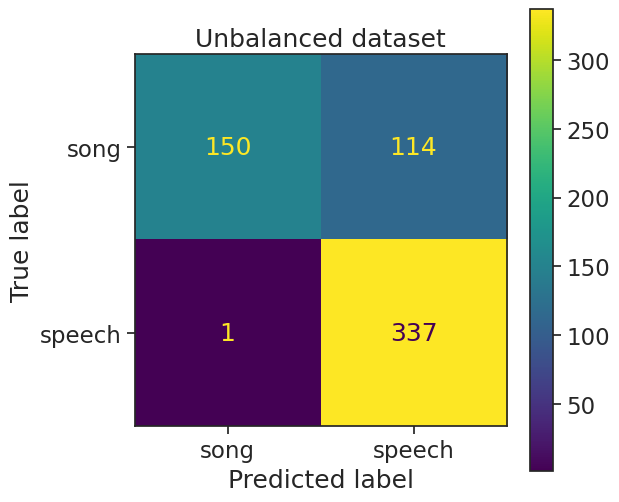

In [33]:
sns.set(rc={'figure.figsize':(6, 6)})
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Unbalanced dataset")
plt.savefig("conf_matrix_imb.pdf", format="pdf")

#ADASYN

In [34]:
# get ADASYN
ada = ADASYN(
    random_state=1
)

# get rebalanced dataset
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'song': 1049, 'speech': 1046})


##PCA

In [35]:
X_train_pca = pca.transform(X_res)

In [36]:
X_train_pca.shape

(2095, 2)

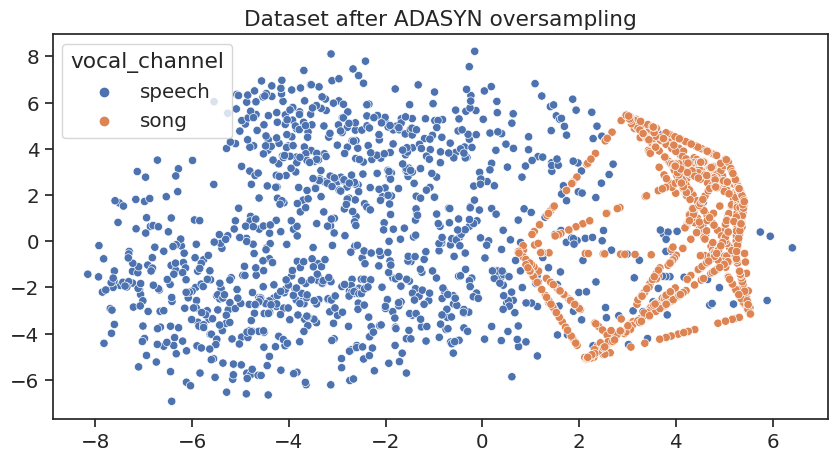

In [37]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.3)

sns.scatterplot(
    x = X_train_pca[:, 0],
    y = X_train_pca[:, 1],
    hue=y_res,
    legend="full"
).set(title="Dataset after ADASYN oversampling")

plt.savefig("dataset_after_ADASYN.svg")

# Test

In [38]:
# get dummy classifier
dummy_clf = DummyClassifier(
    strategy="stratified", 
    random_state=0
)

# fit dummy classifier
dummy_clf.fit(
    X_res, 
    y_res
)

# get baseline for testset (54.48%)
print(dummy_clf.score(X=None, y=y_test))

0.47674418604651164


In [39]:
# get tuned classifier
KNC = KNeighborsClassifier(
    n_neighbors=1, 
    metric="euclidean", 
    weights="distance"
)

In [40]:
# fit tuned classifier
KNC = KNC.fit(X_res, y_res)
y_pred = KNC.predict(X_test)

# get classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        song       0.95      0.94      0.94       264
      speech       0.95      0.96      0.95       338

    accuracy                           0.95       602
   macro avg       0.95      0.95      0.95       602
weighted avg       0.95      0.95      0.95       602



In [41]:
# get roc-auc score
y_pred_prob = KNC.predict_proba(X_test)
roc_auc_score(y_test, y_pred_prob[:, 1])

0.9470929711314326

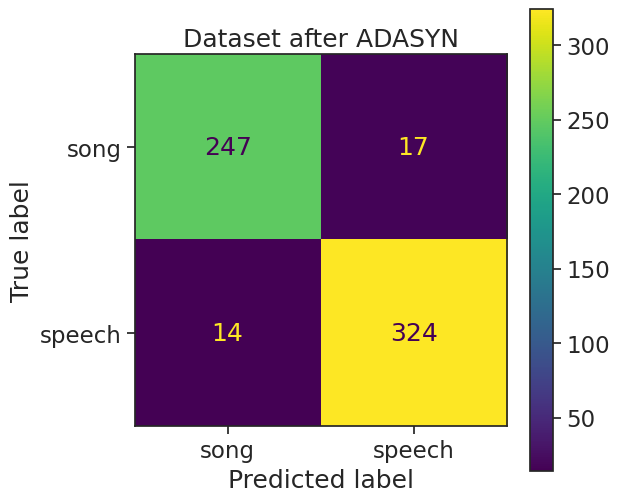

In [45]:
sns.set(rc={'figure.figsize':(6, 6)})
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Dataset after ADASYN")
plt.savefig("conf_matrix_adasyn.pdf", format="pdf")

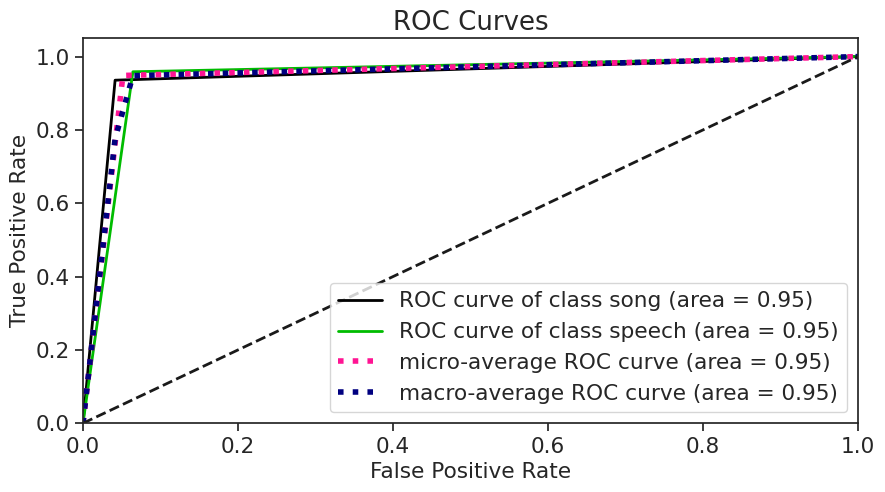

In [ ]:
# plot roc curve
plot_roc(y_test, y_pred_prob)
plt.show()

<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

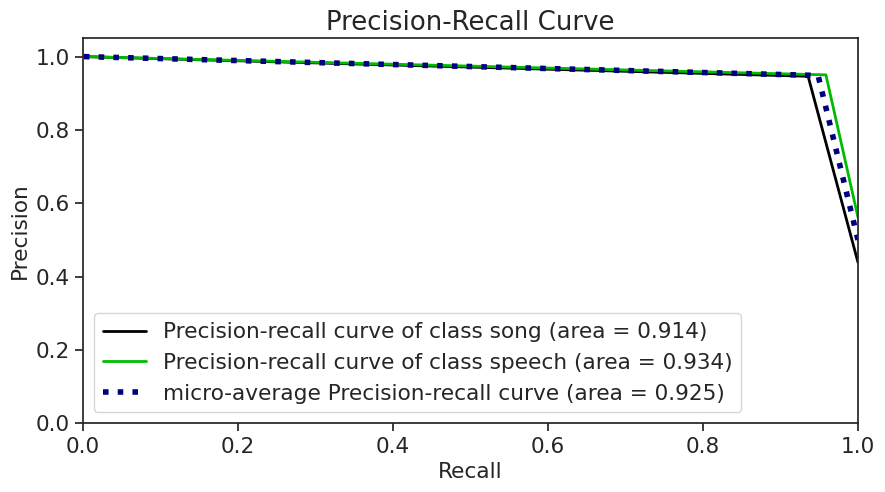

In [ ]:
# plot precision-recall curve
plot_precision_recall(y_test, y_pred_prob)